In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.linspace(-0.5,0.5,100)[:,np.newaxis]
# x_data = x_data.reshape([100,1])
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise 

In [3]:
##
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

In [4]:
#定义输入层神经网络
weight_1 = tf.Variable(tf.random_normal([1,10]))
bias_1 = tf.Variable(tf.random_normal([1,10]))
l1 = tf.matmul(x,weight_1) + bias_1
output_l1 = tf.nn.tanh(l1)

In [5]:
#定义输出层神经网络
weight_2 = tf.Variable(tf.random_normal([10,1]))
bias_2 = tf.Variable(tf.random_normal([1,1]))
l2 = tf.matmul(output_l1,weight_2) + bias_2
predict = tf.nn.tanh(l2)

Iter 0  loss0.8855847
Iter 200  loss0.011714433
Iter 400  loss0.0008596063
Iter 600  loss0.00057824655
Iter 800  loss0.0005653993
Iter 1000  loss0.0005569293
Iter 1200  loss0.00054885284
Iter 1400  loss0.0005410748
Iter 1600  loss0.0005335982
Iter 1800  loss0.0005264434


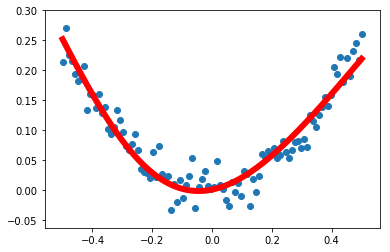

In [20]:
#
loss = tf.reduce_mean(tf.square(predict-y))
# #
train = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(2000):
        sess.run(train,feed_dict={x:x_data,y:y_data})
        l = sess.run(loss,feed_dict={x:x_data,y:y_data})
        if step % 200 == 0:
            print("Iter "+str(step) + "  loss" + str(l))  
            prediction = sess.run(predict,feed_dict={x:x_data})
plt.figure()
plt.scatter(x_data,y_data)
plt.plot(x_data,prediction,'-r',lw=6)
plt.show()
    